# Monte Carlo Integration

## Straightforward implementation without the weight function

A simple Monte Carlo method approximates a multivariable (n-dimensional) integral by
$$ I = \int_\Omega f(x_1,\ldots,x_n) d^n x = \frac{|\Omega|}{N}\sum_{i=1}^N f(x_1^{(i)},\ldots,x_n^{(i)}) $$
where $|\Omega|$ denotes the volume of the region $\Omega$.

The following function approximates a *dim*-dimensional integral of a function $f$ over the hypercube with boundaries given by *dim*-dimensional vectors $a$ and $b$. 
It returns as an output an array with 3 rows (the number of points, approximation of the integral, and error estimation). 
The number of columns is *exp*, while $N = base^{exp}$ gives the number of points for each approximation. The error estimation is obtained as
$$\text{probable error} = 0.67 \frac{|\Omega|}{\sqrt{N}}\left(\frac{1}{N}\sum_{i=1}^N f(x_1^{(i)},\ldots,x_d^{(i)})^2 - 
  \left(\frac{1}{N}\sum_{i=1}^N f(x_1^{(i)},\ldots,x_d^{(i)})\right)^2\right)^{1/2}$$

In [4]:
mySimpleMCIntND[dim_, f_, a_, b_, base_, exp_] :=
  Module[{i, ie, rndPt, volume, I, II, ip, n, out},
   out = ConstantArray[0, {3, exp}];
   volume = Times @@ (b - a);
   n = base^exp; (* the largest number of points *)
   I = 0.0; II = 0.0;
   ie = 1; (* exponent, only results for base^ie points are returned *)
   Do[
    rndPt = a + (b - a) RandomReal[{0.0, 1.0}, dim];
    I = I + f[rndPt]; (* sum of function values *)
    II = II + f[rndPt]^2;(* sum of squares of function values *)
    If[Mod[i, base^ie] == 0,
     out[[All, ie]] = {i, volume*I/i, 
       0.67*volume*Sqrt[(II/i - (I/i)^2)/i]};
     ie++;
     ],
    {i, 1, n}
    ];
   Return[out];
   ];

### The volume of the unit ball in dim dimensions:

# points     integral     error
4            2.           0.67

16           3.           0.290119

64           3.1875       0.134779

256          3.15625      0.0683357

1024         3.08594      0.0351647

4096         3.11719      0.0173664

16384        3.15259      0.00855551

65536        3.14032      0.00430022

262144       3.14008      0.00215033
Exact values: hypercube volume = 4., unit ball volume = 3.14159


Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {estimated error, actual error}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
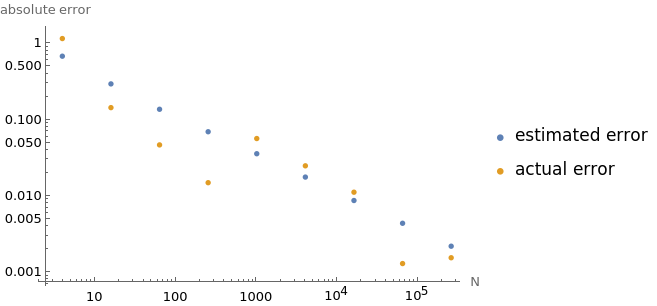

In [200]:
(* the function to integrate, Norm[x] returns the length of vector x *)
f1[x_] := If[Norm[x] <= 1.0, 1.0, 0.0]; 
dim = 2; (* dimension *)
a = ConstantArray[-1, {dim}]; b = -a;(* boundaries, hypercube around the origin *)
int = mySimpleMCIntND[dim, f1, a, b, 4, 9]; (* the largest number of points is 4^10 *)
Print["# points     integral     error"];
Print[MatrixForm[Transpose[int]]];
Print["Exact values: hypercube volume = ", N[2^dim], 
  ", unit ball volume = ", N[Pi^(dim/2)/Gamma[1 + dim/2]]];
ListLogLogPlot[{Transpose[{int[[1, All]], int[[3, All]]}], 
    Transpose[{int[[1, All]], 
      Abs[int[[2, All]] - Pi^(dim/2)/Gamma[1 + dim/2]]}]},
   AxesLabel -> {"N", "absolute error"}, 
   PlotLegends -> {"estimated error", "actual error"}]


### Integration of the function $1/(1+x^2)$

# points      integral      error
4             0.75226       0.0338873

16            0.814118      0.0247825

64            0.783496      0.0125517

256           0.800626      0.00658678

1024          0.79073       0.00338521

4096          0.789373      0.00167843

16384         0.785886      0.000842423

65536         0.784792      0.000420521

262144        0.785316      0.000210286

1048576       0.785693      0.000105143
 
Exact: 0.7853981634, error: 0.000294521
 


Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {estimated error, actual error}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
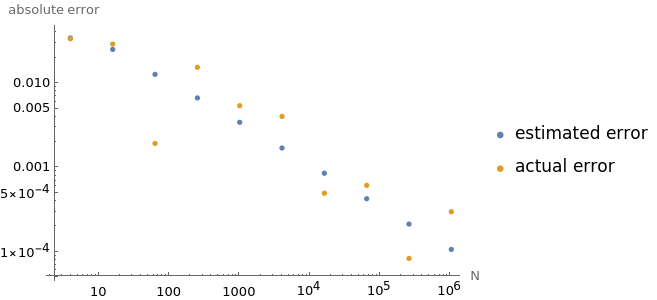

In [190]:
f[x_] := 1/(1 + Norm[x]^2);  
dim = 1;
a = ConstantArray[0, {dim}]; b = ConstantArray[1, {dim}];

int = mySimpleMCIntND[dim, f, a, b, 4, 10];

Print["# points      integral      error"];
Print[MatrixForm[Transpose[int]]];
Print[" "];
Print["Exact: ", N[Pi/4, 10], ", error: ", N[Abs[int[[2, 10]] - Pi/4], 10]];
Print[" "];

ListLogLogPlot[{Transpose[{int[[1, All]], int[[3, All]]}], 
    Transpose[{int[[1, All]], Abs[int[[2, All]] - Pi/4]}]}, 
   AxesLabel -> {"N", "absolute error"}, 
   PlotLegends -> {"estimated error", "actual error"}]


## Integration of the function $1/(1+x^2)$ with the linear function as a weight function

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[2]]}, 
 
>     {f(x), w(x), f(x)/w(x)}, LegendMarkers -> None, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
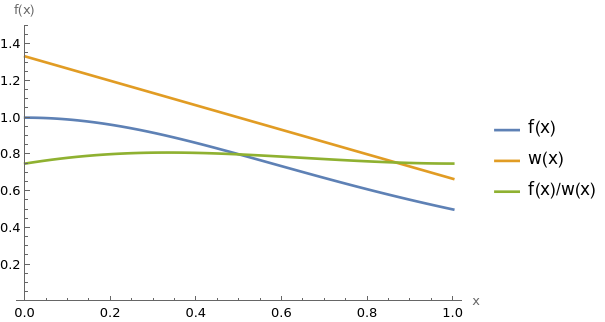

In [169]:
f[x_] := 1/(1 + Norm[x]^2);
w[x_] := (4 - 2 Norm[x])/3; (* normalized linear function used as a weight function *)

fx[y_] := 2 - Sqrt[4 - 3 Norm[y]]; (* inverse of the CDF of the density w(x) *)
f1[y_] := f[fx[y]]/w[fx[y]]; (* actual function to integrate *)

Plot[{f[{x}], w[{x}], f[{x}]/w[{x}]}, {x, a[[1]], b[[1]]}, 
 PlotRange -> {0, 1.5}, AxesLabel -> {"x", "f(x)"}, 
 PlotLegends -> {"f(x)", "w(x)", "f(x)/w(x)"}]

# points      integral      error
4              0.776836       0.00656633

16             0.784198       0.00323065

64             0.781332       0.00178466

256            0.786238       0.000845118

1024           0.786278       0.000415827

4096           0.785651       0.000209256

16384          0.785378       0.000104812

65536          0.785295       0.0000524545

262144         0.785421       0.0000261839

1048576        0.78541        0.0000130848
 
Exact: 0.7853981634, Error: 0.0000121819
 


Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {estimated error, actual error}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
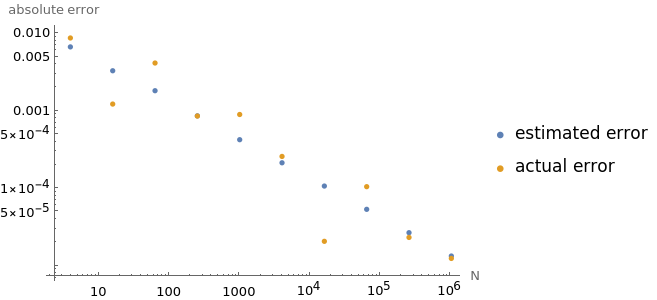

In [182]:
a = {0}; b = {1}; dim = 1;
int = mySimpleMCIntND[dim, f1, a, b, 4, 10];

Print["# points      integral      error"];
Print[MatrixForm[Transpose[int]]];
Print[" "];
Print["Exact: ", N[Pi/4, 10], ", Error: ", N[Abs[int[[2, 10]] - Pi/4], 10]];
Print[" "];

ListLogLogPlot[{Transpose[{int[[1, All]], int[[3, All]]}], 
    Transpose[{int[[1, All]], Abs[int[[2, All]] - Pi/4]}]}, 
   AxesLabel -> {"N", "absolute error"}, 
   PlotLegends -> {"estimated error", "actual error"}]